In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../train.csv')

In [3]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       181931
MarkDown2       208219
MarkDown3       190930
MarkDown4       192420
MarkDown5       181422
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [4]:
# 화씨 온도를 섭씨 온도로 변환
df['Temperature'] = (df['Temperature'] - 32) / 1.8

# 카테고리형으로 변경
df['Type'] = df['Type'].astype('category')
df['IsHoliday'] = df['IsHoliday'].astype('category')
df['Store'] = df['Store'].astype('category')
df['Dept'] = df['Dept'].astype('category')

# 날짜 데이터 datetime형으로 변환 및 연도, 월, 일, 요일 분리
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] =df['Date'].dt.year
df['Month'] =df['Date'].dt.month
df['Day'] =df['Date'].dt.day
df['Day_name'] =df['Date'].dt.day_name()


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282451 entries, 0 to 282450
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         282451 non-null  category      
 1   Dept          282451 non-null  category      
 2   Date          282451 non-null  datetime64[ns]
 3   Weekly_Sales  282451 non-null  float64       
 4   IsHoliday     282451 non-null  category      
 5   Temperature   282451 non-null  float64       
 6   Fuel_Price    282451 non-null  float64       
 7   MarkDown1     100520 non-null  float64       
 8   MarkDown2     74232 non-null   float64       
 9   MarkDown3     91521 non-null   float64       
 10  MarkDown4     90031 non-null   float64       
 11  MarkDown5     101029 non-null  float64       
 12  CPI           282451 non-null  float64       
 13  Unemployment  282451 non-null  float64       
 14  Type          282451 non-null  category      
 15  Size          282

In [6]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       181931
MarkDown2       208219
MarkDown3       190930
MarkDown4       192420
MarkDown5       181422
CPI                  0
Unemployment         0
Type                 0
Size                 0
Year                 0
Month                0
Day                  0
Day_name             0
dtype: int64

In [7]:
# ???
def encode_sin_cos(df,col_n,max_val):
    df[col_n+'_sin'] = np.sin(2*np.pi*df[col_n]/max_val)
    df[col_n+'_cos'] = np.cos(2*np.pi*df[col_n]/max_val)
    
    return df

df_1 = encode_sin_cos(df,'Month',12)
df_1 = encode_sin_cos(df_1,'Day',31)

df_2010 = df_1[df_1['Year'] == 2010]
df_2011 = df_1[df_1['Year'] == 2011]
df_2012 = df_1[df_1['Year'] == 2012]

Text(0.5, 0, 'Sine Encoded Months')

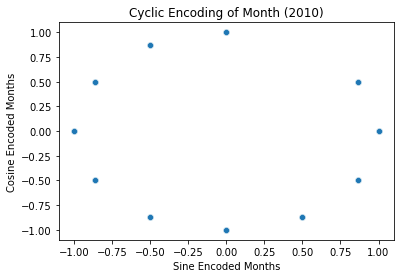

In [8]:
# 2010년 month 존재유무
c_m = sns.scatterplot(x="Month_sin",y="Month_cos",data=df_2010)
c_m.set_title("Cyclic Encoding of Month (2010)")
c_m.set_ylabel("Cosine Encoded Months")
c_m.set_xlabel("Sine Encoded Months")

Text(0.5, 0, 'Sine Encoded Months')

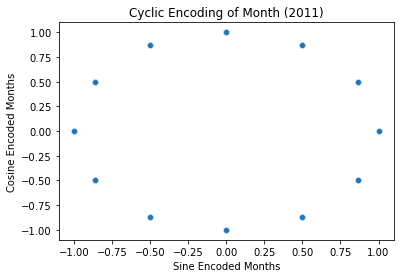

In [9]:
# 2011년 month 존재유무
c_m = sns.scatterplot(x="Month_sin",y="Month_cos",data=df_2011)
c_m.set_title("Cyclic Encoding of Month (2011)")
c_m.set_ylabel("Cosine Encoded Months")
c_m.set_xlabel("Sine Encoded Months")

Text(0.5, 0, 'Sine Encoded Months')

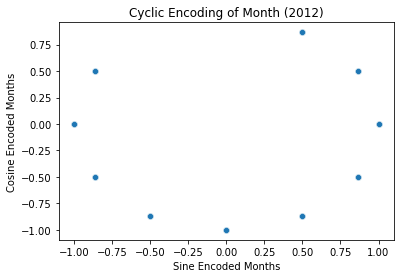

In [10]:
# 2012년 month 존재유무
c_m = sns.scatterplot(x="Month_sin",y="Month_cos",data=df_2012)
c_m.set_title("Cyclic Encoding of Month (2012)")
c_m.set_ylabel("Cosine Encoded Months")
c_m.set_xlabel("Sine Encoded Months")

In [11]:
# 모든 금요일날 해당 주간의 수익을 측정
df['Day_name'].describe()

count     282451
unique         1
top       Friday
freq      282451
Name: Day_name, dtype: object

<AxesSubplot:>

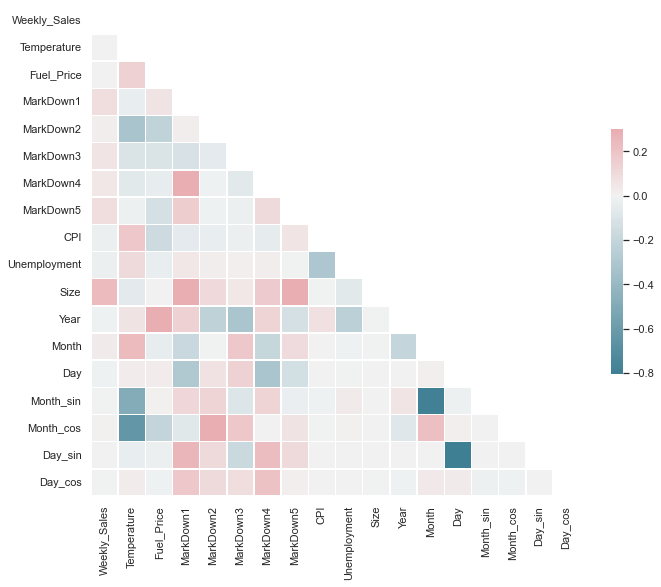

In [12]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [13]:
corr = df.corr()
# corr['Weekly_Sales'].dtypes
corr['Weekly_Sales'].abs().sort_values(ascending=False)

Weekly_Sales    1.000000
Size            0.243935
MarkDown1       0.089862
MarkDown5       0.089408
MarkDown3       0.056325
MarkDown4       0.045958
Month           0.028490
Unemployment    0.025850
MarkDown2       0.023672
CPI             0.022459
Month_cos       0.010222
Year            0.008247
Day             0.007012
Day_cos         0.003231
Month_sin       0.002990
Fuel_Price      0.002720
Day_sin         0.001819
Temperature     0.001079
Name: Weekly_Sales, dtype: float64

<AxesSubplot:ylabel='Temperature'>

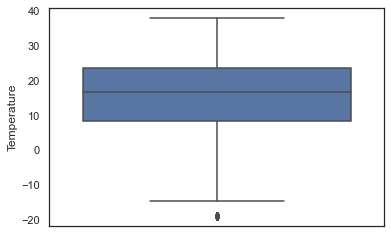

In [14]:
sns.boxplot(y = df['Temperature'])

<AxesSubplot:ylabel='Weekly_Sales'>

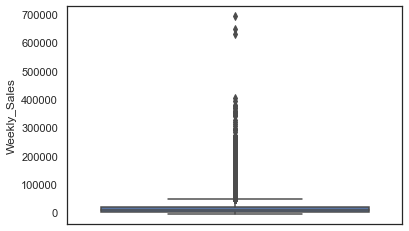

<AxesSubplot:ylabel='Fuel_Price'>

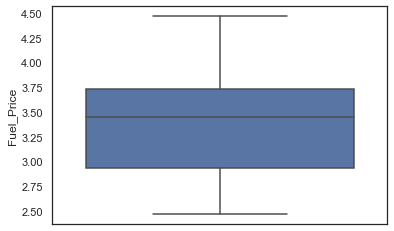

In [19]:
sns.boxplot(y = df['Fuel_Price'])

In [22]:
# pandas의 cut과 qcut을 이용해 수치형 데이터를 범주형 데이터로 변형시킵니다.
bins = [-100000, 0, 100000, 200000, 300000, 400000, 500000, 600000, 700000]
ctg = pd.cut(df['Weekly_Sales'], bins=bins)

# 구간별로 값이 몇 개가 속해 있는지 value_counts()로 확인
ctg.value_counts().sort_index()

salary[0]: 87235.57
salary[0]가 속한 카테고리: (0, 100000]


(-100000, 0]           900
(0, 100000]         278143
(100000, 200000]      3300
(200000, 300000]        87
(300000, 400000]        17
(400000, 500000]         1
(500000, 600000]         0
(600000, 700000]         3
Name: Weekly_Sales, dtype: int64

In [20]:
df['Weekly_Sales'].describe()

count    282451.000000
mean      15983.429692
std       22661.092494
min       -4988.940000
25%        2079.330000
50%        7616.550000
75%       20245.745000
max      693099.360000
Name: Weekly_Sales, dtype: float64